# Example for a multi-armed bandit

## Bandit Class

Setting up the class for a Bernoulli bandit:

In [1]:
import time
import numpy as np
# Bandit class is taken from https://github.com/lilianweng/multi-armed-bandit
class BernoulliBandit(object):

    def __init__(self, n, probas=None):
        assert probas is None or len(probas) == n
        self.n = n
        if probas is None:
            np.random.seed(int(time.time()))
            self.probas = [np.random.random() for _ in range(self.n)]
        else:
            self.probas = probas

        self.best_proba = max(self.probas)

    def generate_reward(self, i):
        # The player selected the i-th machine.
        if np.random.random() < self.probas[i]:
            return 1
        else:
            return 0

## Initilalization

Printing the different assigned reward probabilities (reward is one).

In [2]:
b = BernoulliBandit(10)
print("Randomly generated Bernoulli bandit has reward probabilities:\n", b.probas)
print("The best machine has index: {} and proba: {}".format(max(range(10), key=lambda i: b.probas[i]), max(b.probas)))

Randomly generated Bernoulli bandit has reward probabilities:
 [0.5088387525530237, 0.1550469901176874, 0.5146012539222253, 0.030588328896531958, 0.7175401576909722, 0.24874647883955292, 0.4890218568758812, 0.05206342605726055, 0.21168177059416748, 0.03197098342720395]
The best machine has index: 4 and proba: 0.7175401576909722


## Learning which bandit to choose

Now implement an algorithm that learns to select a bandit (follow the example for random_alg).

In [6]:
rand_alg_return = np.zeros(1000)
rand_return = 0.
your_alg_return = np.zeros(1000)
your_return = 0.
for i in range(0, 1000):
	select_bandit = np.random.randint(10)
	rand_return += b.generate_reward(select_bandit)
	rand_alg_return[i] = rand_return
	# Always select arm 0 ... 
	# Here you should add code!
	your_return += b.generate_reward(0)
	your_alg_return[i] = your_return
print(rand_return/1000., your_return/1000.)

0.272 0.505


## Return over time

Plot the accumulated return over time.

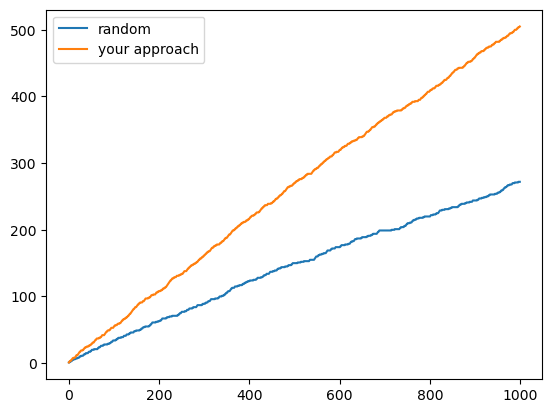

In [7]:
import matplotlib.pyplot as plt
plt.plot(rand_alg_return, label="random")
plt.plot(your_alg_return, label="your approach")
plt.legend()
plt.show()